In [69]:
import pandas as pd
import numpy as np
import os
import yaml
import copy
import matplotlib
import matplotlib.pyplot as plt
import warnings
import random
import collections
from collections import defaultdict
import itertools
import operator
warnings.filterwarnings("ignore")
matplotlib.use('TkAgg')
import networkx as nx
%matplotlib inline

In [2]:
pwd

'/Users/nishant/Desktop/PNNL-2019/December_codes'

In [3]:
def import_network(path):
    """
    path = path to network data
    df = imported network data as a pandas dataframe
    """
    
    df = pd.read_csv(path, sep=" ", 
                 header=None,
                 names=['layer','node1','node2','weight'])
    
    return df


def create_edge_list(df, n_layers):
    
    edges = []
    for i in range(n_layers):
        edges.append(list(zip(df["node1"][df.layer==i+1], df["node2"][df.layer==i+1])))
    
    return edges


def calculate_gc_size(graph):
    """
    gc = giant component
    """
    
    gc_size = [len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)][0]
    
    return gc_size


def calculate_diameter(graph):
    return nx.diameter(graph)

def normalize_gc_list(gc_list):
    
    return np.array(gc_list)/max(gc_list)

In [4]:
if __name__ == "__main__":
    
    config_file = '/Users/nishant/Desktop/PNNL-2019/config.yml'

    
    with open(config_file, 'r') as f:
        config = yaml.safe_load(f)
        path = config['path']
        n_layers = config['n_layers']
        df = import_network(path)
        edges = create_edge_list(df, n_layers)
        

In [5]:
layer_1 = 1
layer_2 = 2
layer_3 = 3

edge_list_1 = edges[layer_1-1]
edge_list_2 = edges[layer_2-1]
edge_list_3 = edges[layer_3-1]


print(len(edge_list_1))
print(len(edge_list_2))
print(len(edge_list_3))


312
83
46


In [6]:
def node_list(df, layer):
    
    temp = list(set(df.node1[df.layer==layer]))
    temp2 = list(set(df.node2[df.layer==layer]))
    node_list = list(set(temp+temp2))
    
    return node_list

In [7]:
node_list_1 = node_list(df, layer_1)
node_list_2 = node_list(df, layer_2)
node_list_3 = node_list(df, layer_3)

print(len(node_list_1))
print(len(node_list_2))
print(len(node_list_3))



271
83
45


In [8]:
G1 = nx.Graph()
G1.add_edges_from(edge_list_1)

G2 = nx.Graph()
G2.add_edges_from(edge_list_2)

G3 = nx.Graph()
G3.add_edges_from(edge_list_3)


#plt.figure(figsize=(20,12))
#nx.draw(G)

In [9]:
agg_edges = edge_list_1 + edge_list_2 + edge_list_3

In [10]:
len(agg_edges)

441

In [11]:
agg_edges = list(set(agg_edges))    #take out common edges across layers
len(agg_edges)

430

In [12]:
agg_G = nx.Graph()
agg_G.add_edges_from(agg_edges)

In [13]:
#313 in agg_G.nodes

In [14]:
"Which Graph to Analyze"

G = agg_G
edge_list = agg_edges

node_list = list(range(len(list(G.nodes))))
len(node_list)

369

In [17]:
def calculate_gc_size(graph):
    """
    gc = giant component
    """
    
    gc_size = [len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)][0]
    
    return gc_size


def calculate_diameter(graph):
    
    return nx.diameter(graph)


def n_connected_components(graph):
    
    return nx.number_connected_components(graph)


def normalize_gc_list(gc_list):
    
    return np.array(gc_list)/max(gc_list)


def network_functionality(original_graph, graph):
    #print('function call success')

    sd = dict(nx.shortest_path_length(graph))

    node_pairs = list(itertools.combinations(graph,2))
    node_weights = nx.betweenness_centrality(original_graph)

    """network functionality"""
    nf = 0

    for pair in node_pairs:
        source, target = pair
        source_w, target_w = node_weights[source], node_weights[target]
        
        #print(source, target)
        
        try:
            nf += source_w * target_w * (1/sd[source][target])
            
        except:
            continue
        
    return nf



In [18]:
initial_gc_size = calculate_gc_size(G)
print(initial_gc_size)

369


In [19]:
"""

#Create all sorted node lists here for removal/addition

#DEGREE
sorted_nodes_by_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)
sorted_nodes_by_degree = [i[0] for i in sorted_nodes_by_degree]


#BETWEENNESS
betweenness_c = nx.betweenness_centrality(G)
temp = sorted(betweenness_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_betweenness = [i[0] for i in temp]


#EIGENVALUE
eigen_c = nx.eigenvector_centrality_numpy(G)
temp = sorted(eigen_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_eigenc = [i[0] for i in temp]

#CLOSENESS
closeness_c = nx.closeness_centrality(G)
temp = sorted(closeness_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_closeness = [i[0] for i in temp]

#CLUSTERING
clustering_c = nx.clustering(G)
temp = sorted(clustering_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_clustering = [i[0] for i in temp]


print(sorted_nodes_by_clustering)
print('\n', len(sorted_nodes_by_clustering))

""";

In [20]:
n_iter = 2

"""RANDOM"""
node_list_copy = copy.deepcopy(node_list)

sorted_nodes_by_random = []

for i in range(n_iter):
    sorted_nodes_by_random.append(random.sample(node_list_copy, 65))
    
print(len(sorted_nodes_by_random[0]))
    

65


In [21]:

def remove_nodes(G, nodes_to_remove, edge_list):

    """
    nodes_to_remove: list

    edge_list: for this layer the orginal list of tuples (edges)
                e.g. [(1,77), (4,13)..]

    returns list of GC sizes as the network fails and the graph remaining 
    """

    
    """initialize updated_edges list with original edge_list"""
    updated_edges = copy.deepcopy(edge_list)
    
    """initialize updated_G with orginial graph G"""
    updated_G = copy.deepcopy(G)
    #initial_gc_size = calculate_gc_size(G)
    initial_gc_size = network_functionality(G,G)
    
    """empty list which will capture gc size as the network fails"""
    gc_list = []
    gc_list.append(initial_gc_size)
    count = 0

    for node in nodes_to_remove:
        #print(node)
        
        updated_G.remove_edges_from(list(G.edges(node)))
        
        #gc_list.append(calculate_gc_size(updated_G))
        gc_list.append(network_functionality(G, updated_G))
        updated_G.remove_node(node)
    
        count +=1
    
    if len(nodes_to_remove) == len(G.nodes()):
        gc_list.append(0)
    
    return gc_list, updated_G, count




In [22]:
"""

#FAILURE

nodes_to_remove = sorted_nodes_by_degree
gc_list_by_degree, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

nodes_to_remove = sorted_nodes_by_betweenness
gc_list_by_betweenness, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

nodes_to_remove = sorted_nodes_by_eigenc
gc_list_by_eigenc, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

nodes_to_remove = sorted_nodes_by_closeness
gc_list_by_closeness, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

nodes_to_remove = sorted_nodes_by_clustering
gc_list_by_clustering, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)

""";

In [23]:
# #FAILURE

"""BETWEENNESS"""
betweenness_c = nx.betweenness_centrality(G)
temp = sorted(betweenness_c.items(), key=lambda kv: kv[1], reverse=True)
sorted_nodes_by_betweenness = [i[0] for i in temp]


nodes_to_remove = sorted_nodes_by_betweenness
gc_list_by_betweenness, updated_G, count = remove_nodes(G, nodes_to_remove, edge_list)


"""RANDOM"""

gc_list_by_random = []
updated_G_list = []

for i in range(n_iter):
    print(i)
    nodes_to_remove = sorted_nodes_by_random[i]
    gc_temp, updated_G_temp, count = remove_nodes(G, nodes_to_remove, edge_list)
    gc_list_by_random.append(normalize_gc_list(gc_temp))
    updated_G_list.append(updated_G_temp)



0
1


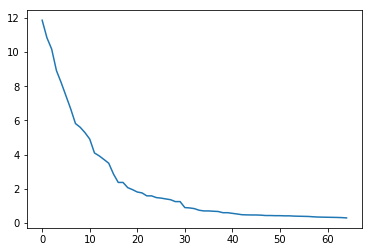

In [24]:
#plt.plot(np.mean(np.array(gc_list_by_random), axis=0))
plt.plot(gc_list_by_betweenness[:65])
plt.show()

In [25]:
def add_nodes(G, updated_G, nodes_to_add, edge_list):
    
    """re: recovery
    """
    
    """initialize the graph object with the graph (updated_G) remaining post failure"""
    re_updated_G = copy.deepcopy(updated_G)
    edges_to_add = copy.deepcopy(edge_list)
     
    """empty list which will capture gc size as the network recovers"""
    re_gc_list = []
    count = 0
    #initial_gc_size = calculate_gc_size(G)
    initial_gc_size = network_functionality(G, G)
    
    #if len(nodes_to_add) != len(G.nodes()):
     #   re_gc_list.append(calculate_gc_size(re_updated_G))
    
    for node in nodes_to_add:
        
        re_gc_list.append(network_functionality(G, re_updated_G))
        re_updated_G.add_node(node)
        re_updated_G.add_edges_from(list(G.edges(node)))
        #re_gc_list.append(network_functionality(G, re_updated_G))
        #re_gc_list.append(calculate_gc_size(re_updated_G))
    
    
    re_gc_list.append(initial_gc_size)
    
    return re_gc_list, re_updated_G, count



In [138]:
"""
#RECOVERY


nodes_to_add = sorted_nodes_by_degree
re_gc_list_by_degree, re_updated_G, count = add_nodes(updated_G, nodes_to_add, edge_list)

nodes_to_add = sorted_nodes_by_betweenness
re_gc_list_by_betweenness, re_updated_G, count = add_nodes(updated_G, nodes_to_add, edge_list)

nodes_to_add = sorted_nodes_by_eigenc
re_gc_list_by_eigenc, re_updated_G, count = add_nodes(updated_G, nodes_to_add, edge_list)

nodes_to_add = sorted_nodes_by_closeness
re_gc_list_by_closeness, re_updated_G, count = add_nodes(updated_G, nodes_to_add, edge_list)

nodes_to_add = sorted_nodes_by_clustering
re_gc_list_by_clustering, re_updated_G, count = add_nodes(updated_G, nodes_to_add, edge_list)
""";

In [26]:
"""RECOVERY - RANDOM"""

#Nodes to Add

re_gc_list_by_random = []
re_updated_G_list = []

for i in range(n_iter):
    nodes_to_add = sorted_nodes_by_random[i]
    re_gc_temp, re_updated_G_temp, count = add_nodes(G, updated_G_list[i], nodes_to_add, edge_list)
    re_gc_list_by_random.append(normalize_gc_list(re_gc_temp))
    re_updated_G_list.append(re_updated_G_temp)


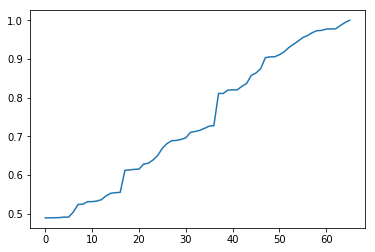

In [27]:
plt.plot(np.mean(np.array(re_gc_list_by_random), axis=0))

#(re_gc_list_by_random[0])

In [117]:
"""RECOVERY - Betweenness"""

nodes_to_add = sorted_nodes_by_betweenness
re_gc_list_by_betweenness, re_updated_G, count = add_nodes(G, updated_G, nodes_to_add, edge_list)



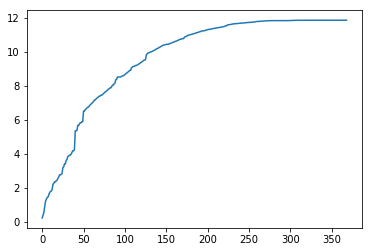

In [165]:
#FAILURE - FLOODS


# node_list_floods = [106, 6, 221, 345, 35, 180, 56, 69, 343, 44, 261, 57, 102, 214, 70, 176, 277, 257, 351, 90, 105, 132, 172, 316, 195, 202, 203, 349, 328, 241, 319, 337, 103, 333, 129, 254, 218, 352, 347, 12, 65, 290, 324, 50, 51, 325, 146, 66, 104, 239, 107, 108, 142, 323, 136, 137, 256, 143, 144, 145, 154, 197, 155, 269, 291]
# print(len(node_list_floods))

# sorted_nodes_by_floods = []

# for i in range(n_iter):
#     sorted_nodes_by_floods.append(random.sample(node_list_floods, len(node_list_floods)))


# gc_list_by_floods = []
# updated_G_list = []

# for i in range(n_iter):
#     nodes_to_remove = sorted_nodes_by_floods[i]
#     gc_temp, updated_G_temp, count = remove_nodes(G, nodes_to_remove, edge_list)
#     gc_list_by_floods.append(normalize_gc_list(gc_temp))
#     updated_G_list.append(updated_G_temp)


65


In [181]:
#FLOOD FAILURE - IN GEO ORDER

near_1 = [6,345,328,221,203,172, 254, 351, 319,214, 180, 343, 277, 35, 56, 57, 337, 333, 256, 144, 65, 66, 108, 323, 291, 269, 106]

near_2 = [44,46,316,255,129,349,70,69,103,137,145,104,239,102,324,290,105,107,143,325,50,51,146]

near_3 = [195,196,261,202,204,154,176,155,136,12,90,347,352,218,197]

print(len(near_1))
print(len(near_2))
print(len(near_3))
print(len(near_1)+len(near_2)+len(near_3))


sorted_nodes_by_floods = []


for i in range(30):
    
    temp = random.sample(near_1, len(near_1)) + random.sample(near_2, len(near_2)) + random.sample(near_3, len(near_3))
    sorted_nodes_by_floods.append(temp)
    
    
gc_list_by_floods = []
updated_G_list = []

for i in range(30):
    nodes_to_remove = sorted_nodes_by_floods[i]
    gc_temp, updated_G_temp, count = remove_nodes(G, nodes_to_remove, edge_list)
    gc_list_by_floods.append(normalize_gc_list(gc_temp))
    updated_G_list.append(updated_G_temp)



27
23
15
65


In [182]:
gc_list_by_floods[0]

array([1.        , 0.94772709, 0.94712472, 0.94651143, 0.94117961,
       0.94109123, 0.86581242, 0.8449736 , 0.81268807, 0.8044181 ,
       0.80151774, 0.79636214, 0.78273363, 0.78249813, 0.77802851,
       0.77757018, 0.77756521, 0.77660615, 0.77660615, 0.76547164,
       0.72862069, 0.684469  , 0.68218914, 0.68180014, 0.6541752 ,
       0.65413257, 0.65413257, 0.65413257, 0.63143684, 0.63136892,
       0.62877109, 0.62772401, 0.62754791, 0.62754791, 0.627404  ,
       0.62502808, 0.62500094, 0.62492804, 0.62228252, 0.62228252,
       0.621694  , 0.62107787, 0.62105933, 0.62102185, 0.62102185,
       0.62028491, 0.62018342, 0.61725917, 0.61725917, 0.60903281,
       0.60854865, 0.60854368, 0.60077156, 0.60077156, 0.60045139,
       0.60045139, 0.59939707, 0.59939707, 0.59618077, 0.59512357,
       0.59484316, 0.59461431, 0.58321813, 0.57481524, 0.57481524,
       0.57481524])

In [132]:
def add_one_node(G, graph, node_to_add):
    
    graph_copy = copy.deepcopy(graph)
    
    nf_1 = network_functionality(G, graph_copy)
    #print(nf_1)
    
    graph_copy.add_node(node_to_add)
    graph_copy.add_edges_from(list(G.edges(node_to_add)))
    
    nf_2 = network_functionality(G, graph_copy)
    #print(nf_2)
    
    delta_nf = nf_2 - nf_1
    
    return delta_nf
    
    
    

In [133]:
updated_G = updated_G_list[0]
initial_nf = network_functionality(G, updated_G)
nodes_to_add = sorted_nodes_by_floods[0]

In [134]:
len(nodes_to_add)

65

In [185]:
#delta_nf = defaultdict(int)
greedy_nodes_to_add = []


while len(nodes_to_add) > 0:
    print(len(nodes_to_add))
    
    delta_nf = defaultdict(int)
    
    for node in nodes_to_add:
        if node not in greedy_nodes_to_add:
            delta_nf[node] = add_one_node(G, updated_G, node)
            
    temp_max_nf = max(delta_nf.items(), key=operator.itemgetter(1))[0]
    print(temp_max_nf)
    greedy_nodes_to_add.append(temp_max_nf)
    print(greedy_nodes_to_add)
    
    nodes_to_add.remove(temp_max_nf)
    



65
180
[180]
64
214
[180, 214]
63
35
[180, 214, 35]
62
349
[180, 214, 35, 349]
61
196
[180, 214, 35, 349, 196]
60
106
[180, 214, 35, 349, 196, 106]
59
6
[180, 214, 35, 349, 196, 106, 6]
58
261
[180, 214, 35, 349, 196, 106, 6, 261]
57
44
[180, 214, 35, 349, 196, 106, 6, 261, 44]
56
347
[180, 214, 35, 349, 196, 106, 6, 261, 44, 347]
55
218
[180, 214, 35, 349, 196, 106, 6, 261, 44, 347, 218]
54
319
[180, 214, 35, 349, 196, 106, 6, 261, 44, 347, 218, 319]
53
46
[180, 214, 35, 349, 196, 106, 6, 261, 44, 347, 218, 319, 46]
52
103
[180, 214, 35, 349, 196, 106, 6, 261, 44, 347, 218, 319, 46, 103]
51
57
[180, 214, 35, 349, 196, 106, 6, 261, 44, 347, 218, 319, 46, 103, 57]
50
290
[180, 214, 35, 349, 196, 106, 6, 261, 44, 347, 218, 319, 46, 103, 57, 290]
49
102
[180, 214, 35, 349, 196, 106, 6, 261, 44, 347, 218, 319, 46, 103, 57, 290, 102]
48
12
[180, 214, 35, 349, 196, 106, 6, 261, 44, 347, 218, 319, 46, 103, 57, 290, 102, 12]
47
56
[180, 214, 35, 349, 196, 106, 6, 261, 44, 347, 218, 319, 46, 10

In [186]:
#max(delta_nf.items(), key=operator.itemgetter(1))[0]
len(greedy_nodes_to_add)

65

In [187]:
"""GREEDY RECOVERY"""

re_gc_list_by_floods_greedy = []
re_updated_G_list = []

nodes_to_add = greedy_nodes_to_add
re_gc_temp, re_updated_G_temp, count = add_nodes(G, updated_G, nodes_to_add, edge_list)
re_gc_list_by_floods_greedy.append(normalize_gc_list(re_gc_temp))
re_updated_G_list.append(updated_G_temp)



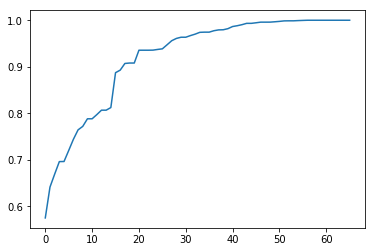

In [188]:
plt.plot(re_gc_list_by_floods_greedy[0])

In [189]:
len(re_gc_list_by_floods_greedy[0])

66

In [25]:
# # #RECOVERY - FLOODS (SAME ORDER AS FAILED)

# # #Nodes to Add

# re_gc_list_by_floods = []
# re_updated_G_list = []

# for i in range(100):
#     nodes_to_add = sorted_nodes_by_floods[i]
#     re_gc_temp, re_updated_G_temp, count = add_nodes(G, updated_G_list[i], nodes_to_add, edge_list)
#     re_gc_list_by_floods.append(normalize_gc_list(re_gc_temp))
#     re_updated_G_list.append(updated_G_temp)


In [167]:
#RECOVERY - FLOODS (BASED ON CEMTRALITY MEASURES)

"DEGREE"
mydict = dict(G.degree(sorted_nodes_by_floods[0]))
sorted_nodes_by_degree = sorted(mydict, reverse=True, key=lambda k: mydict[k])

nodes_to_add = sorted_nodes_by_degree
re_gc_list_by_degree, re_updated_G, count = add_nodes(G, updated_G_list[0], nodes_to_add, edge_list)
re_gc_list_by_degree = normalize_gc_list(re_gc_list_by_degree)

"BETWEENNESS"
sorted_nodes_by_betweenness = []
my_dict = nx.betweenness_centrality(G)
wanted_keys = sorted_nodes_by_floods[0]
temp = dict((k, my_dict[k]) for k in wanted_keys if k in my_dict)
sorted_nodes_by_betweenness = sorted(temp, reverse=True, key=lambda k: temp[k])

nodes_to_add = sorted_nodes_by_betweenness
re_gc_list_by_betweenness, re_updated_G, count = add_nodes(G, updated_G_list[0], nodes_to_add, edge_list)
re_gc_list_by_betweenness = normalize_gc_list(re_gc_list_by_betweenness)

"EIGENVECTOR"
sorted_nodes_by_eigenc = []
my_dict = nx.eigenvector_centrality(G)
wanted_keys = sorted_nodes_by_floods[0]
temp = dict((k, my_dict[k]) for k in wanted_keys if k in my_dict)
sorted_nodes_by_eigenc = sorted(temp, reverse=True, key=lambda k: temp[k])

nodes_to_add = sorted_nodes_by_eigenc
re_gc_list_by_eigenc, re_updated_G, count = add_nodes(G, updated_G_list[0], nodes_to_add, edge_list)
re_gc_list_by_eigenc = normalize_gc_list(re_gc_list_by_eigenc)

# "CLOSENESS"
# sorted_nodes_by_closeness = []
# my_dict = nx.closeness_centrality(G)
# wanted_keys = sorted_nodes_by_floods[0]
# temp = dict((k, my_dict[k]) for k in wanted_keys if k in my_dict)
# sorted_nodes_by_closeness = sorted(temp, reverse=True, key=lambda k: temp[k])

# nodes_to_add = sorted_nodes_by_closeness
# re_gc_list_by_closeness, re_updated_G, count = add_nodes(G, updated_G_list[0], nodes_to_add, edge_list)
# re_gc_list_by_closeness = normalize_gc_list(re_gc_list_by_closeness)




In [168]:
print('done')

done


In [190]:
"""RANDOM FLOOD RECOVERY"""

re_gc_list_by_floods_random = []

for i in range(30):
    nodes_to_add = random.sample(sorted_nodes_by_floods[0], len(sorted_nodes_by_floods[0]))
    temp, re_updated_G, count = add_nodes(G, updated_G_list[i], nodes_to_add, edge_list)
    temp = normalize_gc_list(temp)
    re_gc_list_by_floods_random.append(temp)


re_gc_list_by_floods_random_mean = np.mean(np.array(re_gc_list_by_floods_random), axis=0)

print(len(re_gc_list_by_floods_random[0]))
print(len(re_gc_list_by_floods_random_mean))


66
66


In [191]:
len(re_gc_list_by_betweenness)

66

In [28]:
"""

#EXTRACT GC SIZE LISTS

np.save('agg_gc_list_by_random', gc_list_by_random)
np.save('agg_re_gc_list_by_random', re_gc_list_by_random)

np.save('agg_gc_list_by_degree', gc_list_by_degree)
np.save('agg_re_gc_list_by_degree', re_gc_list_by_degree)

np.save('agg_gc_list_by_betweenness', gc_list_by_betweenness)
np.save('agg_re_gc_list_by_betweenness', re_gc_list_by_betweenness)

np.save('agg_gc_list_by_eigenc', gc_list_by_eigenc)
np.save('agg_re_gc_list_by_eigenc', re_gc_list_by_eigenc)

np.save('agg_gc_list_by_closeness', gc_list_by_closeness)
np.save('agg_re_gc_list_by_closeness', re_gc_list_by_closeness)

np.save('agg_gc_list_by_clustering', gc_list_by_clustering)
np.save('agg_re_gc_list_by_clustering', re_gc_list_by_clustering)

""";

In [193]:
#Ensemble Mean - Random

gc_array_by_random = np.array(gc_list_by_random)
re_gc_array_by_random = np.array(re_gc_list_by_random)


gc_list_by_random_mean = np.mean(gc_array_by_random, axis=0)
re_gc_list_by_random_mean = np.mean(re_gc_array_by_random, axis=0)

gc_list_by_floods_mean = np.mean(gc_list_by_floods, axis=0)



In [30]:
# #Ensemble Mean - Floods

# gc_array_by_floods = np.array(gc_list_by_floods)
# re_gc_array_by_floods = np.array(re_gc_list_by_floods)


# gc_list_by_floods_mean = np.mean(gc_array_by_floods, axis=0)
# re_gc_list_by_floods_mean = np.mean(re_gc_array_by_floods, axis=0)



In [31]:

#np.save('agg_gc_list_by_random', gc_by_random_mean)
#np.save('agg_re_gc_list_by_random', re_gc_by_random_mean)

In [32]:
# np.save('agg_gc_list_by_floods', gc_by_floods_mean)
# np.save('agg_re_gc_list_by_floods', re_gc_by_floods_mean)

In [33]:
# node_frac = np.arange(len(gc_list_by_floods[0]))/(len(gc_list_by_floods[0])-1)
# len(node_frac)

In [173]:
node_frac = np.arange(len(gc_list_by_floods[0]))
len(node_frac)

66

In [144]:
# os.chdir('/Users/nishant/Desktop/PNNL-2019/Flood_Failure')


# """Load Random-Local Case"""

# gc_list_by_random_local = np.load('agg_gc_list_by_random_local.npy')
# re_gc_list_by_random_local = np.load('agg_re_gc_list_by_random_local.npy')

# gc_list_by_random_local_mean = np.load('agg_gc_list_by_random_local_mean.npy')
# re_gc_list_by_random_local_mean = np.load('agg_re_gc_list_by_random_local_mean.npy')


# """Load Targeted Failure Case (Betweenness)"""

# gc_list_by_betweenness = np.load('agg_gc_list_by_betweenness.npy')
# #re_gc_list_by_betweenness = np.load('agg_re_gc_list_by_betweenness.npy')


# """Load Flood-Geo Case"""

# gc_list_by_floods_geo = np.load('agg_gc_list_by_floods_geo.npy')
# re_gc_list_by_floods_geo = np.load('agg_re_gc_list_by_floods_geo.npy')

# gc_list_by_floods_geo_mean = np.load('agg_gc_list_by_floods_geo_mean.npy')
# re_gc_list_by_floods_geo_mean = np.load('agg_re_gc_list_by_floods_geo_mean.npy')


# """Load Failure Case for Flood + Targeted"""
# gc_list_by_floods_targeted = np.load('gc_list_by_floods_targeted.npy')
# gc_list_by_floods_targeted_mean = np.load('gc_list_by_floods_targeted_mean.npy')


In [145]:
len(gc_list_by_floods_targeted[0])

66

In [158]:
node_frac = np.arange(66)

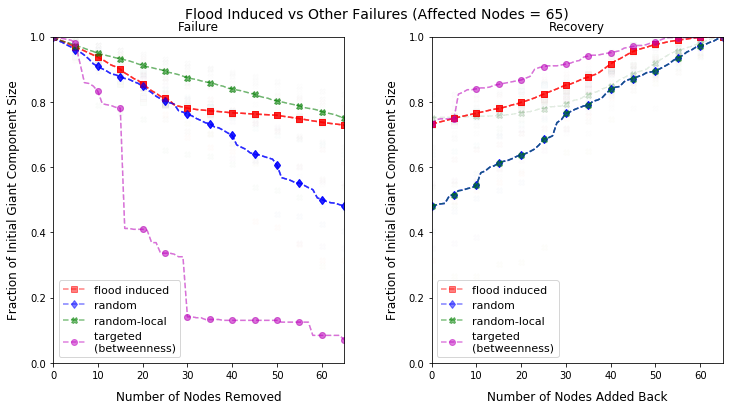

In [56]:
plt.figure(figsize=(12,6))

for i in range(n_iter):

    plt.subplot(1,2,1)
    
    plt.plot(node_frac, gc_list_by_floods_geo[i],'s', alpha=0.010, markevery=5)
    plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', alpha=0.1, markevery=5)
    
    plt.plot(node_frac, gc_list_by_random[i],'X', alpha=0.010, markevery=5)
    plt.plot(node_frac, gc_list_by_random_mean,'b--d', alpha=0.1, markevery=5)
    
    plt.plot(node_frac, gc_list_by_random_local[i],'X', alpha=0.005, markevery=5)
    plt.plot(node_frac, gc_list_by_random_local_mean,'g--X',alpha=0.01, markevery=5)
    
    plt.plot(node_frac, gc_list_by_betweenness[:66],'m--o', markevery=5, alpha=0.01)

    

    plt.ylim(top=1, bottom=0)
    #plt.xlim(left=0, right=1)
    plt.xlabel('Number of Nodes Removed', fontsize=12, labelpad=10)
    plt.ylabel('Fraction of Initial Giant Component Size', fontsize=12, labelpad=10)
    plt.title('Failure')
    plt.margins(x=0, y=0)
    
plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', label='flood induced', markevery=5, alpha=0.5)
plt.plot(node_frac, gc_list_by_random_mean,'b--d', label='random', markevery=5, alpha=0.5)
plt.plot(node_frac, gc_list_by_random_local_mean,'g--X', label='random-local', markevery=5, alpha=0.5)
plt.plot(node_frac, gc_list_by_betweenness[:66],'m--o', label='targeted \n(betweenness)', markevery=5, alpha=0.5)

plt.legend(fontsize=11)


for i in range(n_iter):
    
    plt.subplot(1,2,2)    
    
    plt.plot(node_frac, re_gc_list_by_floods_geo[i],'s', alpha=0.010, markevery=5)
    plt.plot(node_frac, re_gc_list_by_floods_geo_mean,'r--s', alpha=0.1, markevery=5)
    
    plt.plot(node_frac, re_gc_list_by_random[i],'X', alpha=0.010, markevery=5)
    plt.plot(node_frac, re_gc_list_by_random_mean,'b--d', alpha=0.1, markevery=5)
    plt.plot(node_frac, re_gc_list_by_random_local[i],'X', alpha=0.005, markevery=5)
    plt.plot(node_frac, re_gc_list_by_random_local_mean,'g--X',alpha=0.01, markevery=5)
    
    plt.plot(node_frac, re_gc_list_by_betweenness[:66],'m--o', markevery=5, alpha=0.01)

    

    plt.ylim(top=1, bottom=0)
    #plt.xlim(left=0, right=1)
    plt.xlabel('Number of Nodes Added Back', fontsize=12, labelpad=10)
    plt.ylabel('Fraction of Initial Giant Component Size', fontsize=12, labelpad=10)
    plt.title('Recovery')
    plt.margins(x=0, y=0)
    
plt.plot(node_frac, re_gc_list_by_floods_geo_mean,'r--s', label='flood induced', markevery=5, alpha=0.5)
plt.plot(node_frac, re_gc_list_by_random_mean,'b--d', label='random', markevery=5, alpha=0.5)
plt.plot(node_frac, re_gc_list_by_random_mean,'g--X', label='random-local', markevery=5, alpha=0.5)
plt.plot(node_frac, re_gc_list_by_betweenness[:66],'m--o', label='targeted \n(betweenness)', markevery=5, alpha=0.5)

plt.legend(fontsize=11)


plt.subplots_adjust(wspace=0.3)
plt.suptitle('Flood Induced vs Other Failures (Affected Nodes = 65)', y=0.95, fontsize='14')
#plt.savefig('flood-vs-random-ensemble.pdf')
plt.show()

In [ ]:
re_gc_list_by_betweenness

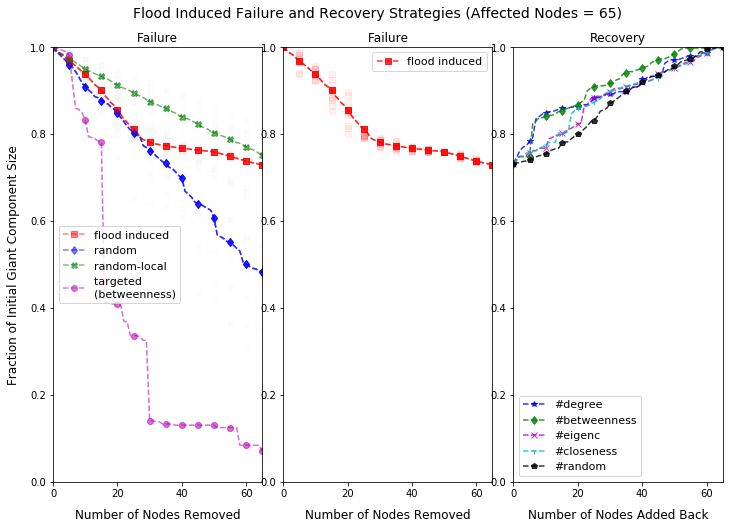

In [57]:
#PLOTTING FLOOD GEO FAIURE vs CENTRALITY BASED RECOVERIES

plt.figure(figsize=(12,8))

for i in range(n_iter):

    plt.subplot(1,3,1)

    plt.plot(node_frac, gc_list_by_floods_geo[i],'s', alpha=0.010, markevery=5)
    plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', alpha=0.1, markevery=5)
    
    plt.plot(node_frac, gc_list_by_random[i],'X', alpha=0.010, markevery=5)
    plt.plot(node_frac, gc_list_by_random_mean,'b--d', alpha=0.1, markevery=5)
    
    plt.plot(node_frac, gc_list_by_random_local[i],'X', alpha=0.005, markevery=5)
    plt.plot(node_frac, gc_list_by_random_local_mean,'g--X',alpha=0.01, markevery=5)
    
    plt.plot(node_frac, gc_list_by_betweenness[:66],'m--o', markevery=5, alpha=0.01)

    

    plt.ylim(top=1, bottom=0)
    #plt.xlim(left=0, right=1)
    plt.xlabel('Number of Nodes Removed', fontsize=12, labelpad=10)
    plt.ylabel('Fraction of Initial Giant Component Size', fontsize=12, labelpad=10)
    plt.title('Failure')
    plt.margins(x=0, y=0)
    
plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', label='flood induced', markevery=5, alpha=0.5)
plt.plot(node_frac, gc_list_by_random_mean,'b--d', label='random', markevery=5, alpha=0.5)
plt.plot(node_frac, gc_list_by_random_local_mean,'g--X', label='random-local', markevery=5, alpha=0.5)
plt.plot(node_frac, gc_list_by_betweenness[:66],'m--o', label='targeted \n(betweenness)', markevery=5, alpha=0.5)

plt.legend(fontsize=11)



plt.subplot(1,3,2)

for i in range(n_iter):
    plt.plot(node_frac, gc_list_by_floods_geo[i],'rs', alpha=0.050, markevery=5)
    plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', alpha=0.05, markevery=5)


plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', label='flood induced', markevery=5, alpha=0.8)
    
plt.ylim(top=1, bottom=0)
#plt.xlim(left=0, right=1)
plt.xlabel('Number of Nodes Removed', fontsize=12, labelpad=10)
#plt.ylabel('Fraction of Initial Giant Component Size', fontsize=12, labelpad=10)
plt.title('Failure')
plt.margins(x=0, y=0)
    
plt.legend(fontsize=11)

    
plt.subplot(1,3,3)    
    
plt.plot(node_frac, re_gc_list_by_degree,'b--*', label='#degree', markevery=5, alpha=0.8)
plt.plot(node_frac, re_gc_list_by_betweenness,'g--d', label='#betweenness', markevery=5, alpha=0.8)
plt.plot(node_frac, re_gc_list_by_eigenc,'m--x', label='#eigenc', markevery=5, alpha=0.8)
plt.plot(node_frac, re_gc_list_by_closeness,'c--1', label='#closeness', markevery=5, alpha=0.8)
plt.plot(node_frac, re_gc_list_by_floods_random_mean,'k--p', label='#random', markevery=5, alpha=0.8)



plt.ylim(top=1, bottom=0)
#plt.xlim(left=0, right=1)
plt.xlabel('Number of Nodes Added Back', fontsize=12, labelpad=10)
#plt.ylabel('Fraction of Initial Giant Component Size', fontsize=12, labelpad=10)
plt.title('Recovery')
plt.margins(x=0, y=0)
plt.legend(fontsize=11)


plt.subplots_adjust(wspace=0.1)
plt.suptitle('Flood Induced Failure and Recovery Strategies (Affected Nodes = 65)', y=0.95, fontsize='14')
#plt.savefig('flood-vs-random-ensemble.pdf')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (66,) and (65,)

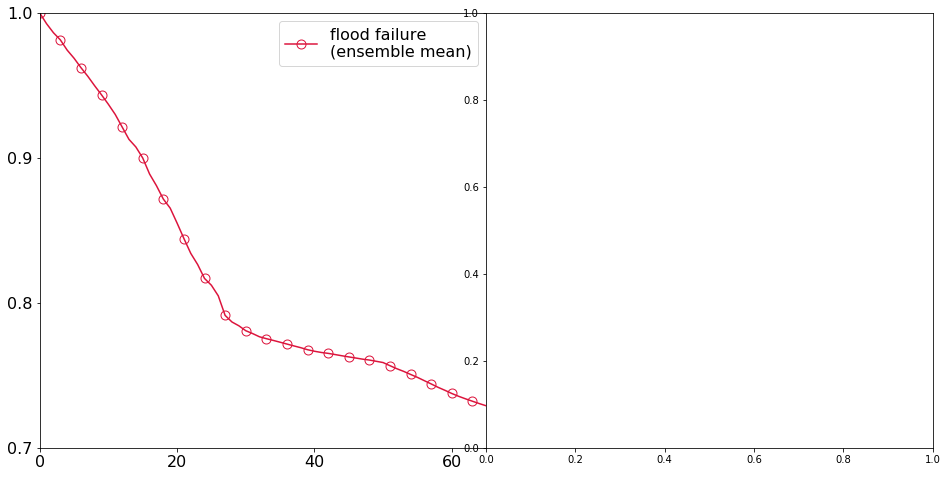

In [147]:
grid = plt.GridSpec(1, 2, wspace=0, hspace=0.2)
plt.figure(figsize=(16,8))

"""SUBPLOT 1"""
# plt.subplot(grid[0, 0])
# for i in range(10):
#     plt.plot(node_frac, gc_list_by_floods_geo[i],'rs', alpha=0.1, markevery=5)
#     plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', alpha=0.1, markevery=5)
    
#     plt.plot(node_frac, gc_list_by_random[i],'bs', alpha=0.1, markevery=5)
#     plt.plot(node_frac, gc_list_by_random_mean,'b--d', alpha=0.1, markevery=5)
    
#     plt.plot(node_frac, gc_list_by_random_local[i],'gX', alpha=0.1, markevery=5)
#     plt.plot(node_frac, gc_list_by_random_local_mean,'g--X',alpha=0.01, markevery=5)
    
#     #plt.plot(node_frac, gc_list_by_floods_targeted[i],'ks', alpha=0.1, markevery=5)
#     #plt.plot(node_frac, gc_list_by_floods_targeted_mean,'k--P', alpha=0.1, markevery=5)
    
#     #plt.plot(node_frac, gc_list_by_betweenness[:66],'m--o', markevery=5, alpha=0.01)

#     plt.ylim(top=1, bottom=0)
#     #plt.xlim(left=0, right=1)
#     plt.xlabel('Number of Nodes Removed', fontsize=12, labelpad=10)
#     plt.ylabel(r'P$\infty$', fontsize=20, labelpad=10)
#     plt.title('Failure')
#     plt.margins(x=0, y=0)
    
# plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', label='flood induced', markevery=5, alpha=0.5)
# plt.plot(node_frac, gc_list_by_random_mean,'b--d', label='random', markevery=5, alpha=0.5)
# plt.plot(node_frac, gc_list_by_random_local_mean,'g--X', label='random-local', markevery=5, alpha=0.5)

# plt.legend(fontsize=11)
# plt.text(0,1.07, "(a)", fontsize=16, weight='bold')

# """SUBPLOT 2"""
# plt.subplot(grid[0, 1])

# for i in range(10):
#     plt.plot(node_frac, gc_list_by_floods_geo[i],'rs', alpha=0.1, markevery=5)
#     plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', alpha=0.1, markevery=5)
    
#     plt.plot(node_frac, gc_list_by_floods_targeted[i],'ks', alpha=0.1, markevery=5)
#     plt.plot(node_frac, gc_list_by_floods_targeted_mean,'k--P', alpha=0.1, markevery=5)
    
#     plt.plot(node_frac, gc_list_by_betweenness[:66],'m--o', markevery=5, alpha=0.01)

# plt.ylim(top=1, bottom=0)
# #plt.xlim(left=0, right=1)
# plt.xlabel('Number of Nodes Removed', fontsize=12, labelpad=10)
# #plt.ylabel(r'P$\infty$', fontsize=20, labelpad=10)
# plt.title('Failure')
# plt.margins(x=0, y=0)


# plt.plot(node_frac, gc_list_by_floods_geo_mean,'r--s', label='flood induced', markevery=5, alpha=0.5)
# plt.plot(node_frac, gc_list_by_betweenness[:66],'m--o', label='targeted\n(degree)', markevery=5, alpha=0.8)
# plt.plot(node_frac, gc_list_by_floods_targeted_mean,'k--P',label='compound\n(flood+targeted)', markevery=5, alpha=0.5)

# plt.legend(fontsize=11)
# plt.text(0,1.07, "(b)", fontsize=16, weight='bold')

"""SUBPLOT 3"""
plt.subplot(grid[0, 0])
plt.plot(node_frac, gc_list_by_floods_geo_mean,'-o', color='crimson', label='flood failure\n(ensemble mean)', markersize=9, markerfacecolor='none', markevery=3, alpha=1)
    
plt.ylim(top=1, bottom=0.7)
#plt.xlim(left=0, right=1)
#plt.xlabel('Number of Nodes Removed (total=65)', fontsize=12, labelpad=10)
#plt.ylabel('Relative Giant Component Size', fontsize=12, labelpad=10)
#plt.title('Failure')
plt.margins(x=0, y=0)
plt.yticks([0.7,0.8,0.9,1], fontsize=16)
plt.xticks([0,20,40,60], fontsize=16)


#plt.text(0,1.03, "a", fontsize=16, weight='bold')
plt.legend(fontsize=16)


"""SUBPLOT 4"""
plt.subplot(grid[0, 1])

plt.plot(node_frac, re_gc_list_by_degree,'-*', color='blue', label='degree', markersize=9, markerfacecolor='none', markevery=3, alpha=1)
plt.plot(node_frac, re_gc_list_by_betweenness,'g-s', label='betweenness',markersize=9, markerfacecolor='none', markevery=3, alpha=1)
plt.plot(node_frac, re_gc_list_by_eigenc,'m-X', label='eigenvector',markersize=9, markerfacecolor='none',markevery=3, alpha=1)
#plt.plot(node_frac, re_gc_list_by_closeness,'c-P', label='#closeness',markersize=10, markerfacecolor='none', markevery=3, alpha=1)
plt.plot(node_frac, re_gc_list_by_floods_random_mean,'k-p', label='random', markersize=9, markerfacecolor='none',markevery=3, alpha=1)
#plt.plot(node_frac, re_gc_list_by_floods_geo_mean,'-o', color='crimson', markersize=9, label='reverse order\n(flood)', markerfacecolor='none', markevery=3, alpha=1)



plt.ylim(top=1, bottom=0.7)
#plt.xlim(left=0, right=1)
#plt.xlabel('Number of Nodes Added Back (total=65)', fontsize=12, labelpad=10)
#plt.ylabel('Fraction of Initial Giant Component Size', fontsize=12, labelpad=10)
#plt.title('Recovery')
plt.margins(x=0, y=0)
plt.legend(fontsize=16, loc='lower right')
plt.xticks([0,20,40,60], fontsize=16)
plt.yticks([])
#plt.text(0,1.03, "b", fontsize=16, weight='bold')

#plt.savefig('flood-recovery.pdf', dpi=1200, bbox_inches='tight')
plt.show()

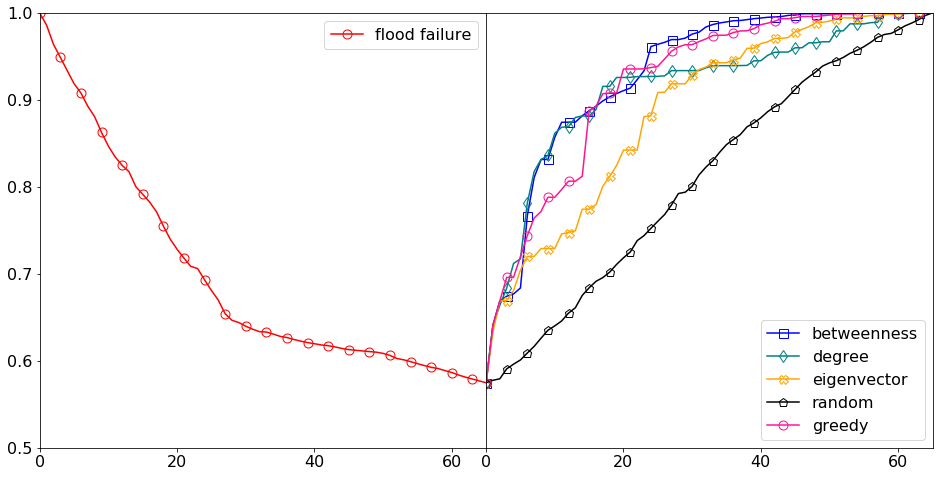

In [211]:
plt.figure(figsize=(16,8))


plt.subplot(1,2,1)
plt.plot(gc_list_by_floods_mean, 'o-r', markevery=3, markersize=9, label='flood failure', markerfacecolor='none', alpha=1)
plt.margins(x=0, y=0)
plt.xticks([0,20,40,60], fontsize=16)
plt.yticks([0.5,0.6,0.7,0.8,0.9,1.0], fontsize=16)
plt.legend(fontsize=16)



plt.subplot(1,2,2)
plt.margins(x=0, y=0)
plt.xticks([0,20,40,60], fontsize=16)
plt.yticks([])
plt.ylim(top=1, bottom=0.5)

plt.plot(node_frac, re_gc_list_by_betweenness,'-s', color='blue', label='betweenness',markersize=9, markerfacecolor='none', markevery=3, alpha=1)
plt.plot(node_frac, re_gc_list_by_degree,'-d', color='teal', label='degree', markersize=9, markerfacecolor='none', markevery=3, alpha=1)
plt.plot(node_frac, re_gc_list_by_eigenc,'-X', color='orange', label='eigenvector',markersize=9, markerfacecolor='none',markevery=3, alpha=1)
#plt.plot(node_frac, re_gc_list_by_closeness,'c-P', label='#closeness',markersize=10, markerfacecolor='none', markevery=3, alpha=1)
plt.plot(node_frac, re_gc_list_by_floods_random_mean,'k-p', label='random', markersize=9, markerfacecolor='none',markevery=3, alpha=1)
#plt.plot(node_frac, re_gc_list_by_floods_geo_mean,'-o', color='crimson', markersize=9, label='reverse order\n(flood)', markerfacecolor='none', markevery=3, alpha=1)
plt.plot(node_frac, re_gc_list_by_floods_greedy[0],'-o', color='deeppink', label='greedy', markersize=9, markerfacecolor='none',markevery=3, alpha=1)

plt.legend(fontsize=16)


plt.subplots_adjust(wspace=0)

os.chdir('/Users/nishant/Desktop/PNNL-2019/December_codes/')
plt.savefig('flood-recovery-with-greedy.pdf', dpi=1200, bbox_inches='tight')
plt.show()


In [188]:
pwd


'/Users/nishant/Desktop/PNNL-2019/Flood_Failure'

In [212]:
from numpy import trapz

In [241]:
area1 = sum(re_gc_list_by_betweenness)
area2 = sum(re_gc_list_by_floods_greedy[0])
area3 = sum(re_gc_list_by_degree)
area4 = sum(re_gc_list_by_eigenc)
area5 = sum(re_gc_list_by_floods_random_mean)



In [250]:
p1 = 100*(area1-area5)/(area5-0.57*65)
p2 = 100*(area2-area5)/(area5-0.57*65)
p3 = 100*(area3-area5)/(area5-0.57*65)
p4 = 100*(area4-area5)/(area5-0.57*65)


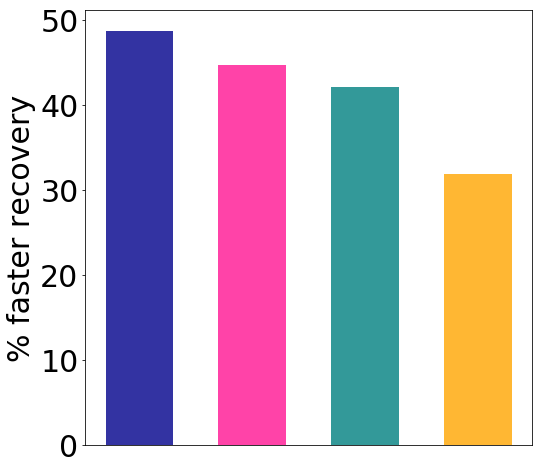

In [277]:
plt.figure(figsize=(8,8))

height = [p1,p2,p3,p4]
x = [1,2,3,4]
names = ['betweenness', 'greedy', 'degree', 'eigenvector']
plt.bar(x, height, width=0.6, alpha=0.8, color=['darkblue', 'deeppink', 'teal', 'orange'])
plt.xticks([])
plt.ylabel('% faster recovery', fontsize=30)
plt.yticks(fontsize=30)
plt.savefig('recovery-barplot.pdf', dpi=1200, bbox_inches='tight')
plt.show()